Import Libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Laden der Daten

In [43]:
df = pd.read_csv('/home/pbolle/Dokumente/weather/converted/model1.csv', usecols=['date', 'hum_in', 'temp_out'],
                   parse_dates=['date'])

zwei neue Spalten mit Woche und Tag
die ersten 5 Einträge

In [44]:
df['day'] = df.apply(lambda row: row['date'].strftime('%Y-%m-%d'), axis=1)
df['week'] = df.apply(lambda row: row['date'].strftime('%Y-%W'), axis=1)

df.head()

,date,hum_in,temp_out,day,week
0,2017-10-27 21:16:00,43,8.3,2017-10-27,2017-43
1,2017-10-27 21:21:00,43,8.3,2017-10-27,2017-43
2,2017-10-27 21:26:00,43,8.3,2017-10-27,2017-43
3,2017-10-27 21:31:00,43,8.3,2017-10-27,2017-43
4,2017-10-27 21:36:00,43,8.4,2017-10-27,2017-43


Mache Date zum Index

In [45]:
df.set_index(['day','week','date'], inplace=True)

#dfi=df.set_index(['day','week',])
df.head()

hum_in  temp_out
day        week    date                                 
2017-10-27 2017-43 2017-10-27 21:16:00      43       8.3
                   2017-10-27 21:21:00      43       8.3
                   2017-10-27 21:26:00      43       8.3
                   2017-10-27 21:31:00      43       8.3
                   2017-10-27 21:36:00      43       8.4

Infromationen über das Dataframe (Datentypen,Größe)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23442 entries, (2017-10-27, 2017-43, 2017-10-27 21:16:00) to (2018-01-20, 2018-03, 2018-01-20 08:53:59)
Data columns (total 2 columns):
hum_in      23442 non-null int64
temp_out    23442 non-null float64
dtypes: float64(1), int64(1)
memory usage: 641.9+ KB


Max Temperatur

In [47]:
df['temp_out'].max()

15.3

Min Temperatur

In [48]:
df['temp_out'].min()

-4.1

Temperatur Kurve

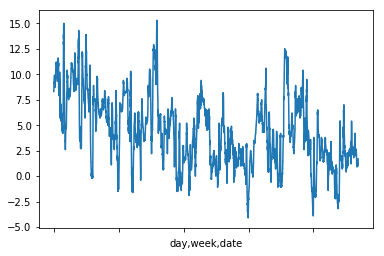

In [49]:
df['temp_out'].plot()

In [73]:
result = df.groupby('week')['temp_out'].agg(['max','min'])
result['diff'] = result['max']-result['min']
result

,max,min,diff
week,,,
2017-43,11.6,5.2,6.4
2017-44,15.0,2.6,12.4
2017-45,10.9,-0.2,11.1
2017-46,10.3,-1.6,11.9
2017-47,15.3,-0.4,15.7
2017-48,7.7,-1.9,9.6
2017-49,9.4,-1.1,10.5
2017-50,8.2,-0.7,8.9
2017-51,9.0,-4.1,13.1


In [65]:
df['2017-11-01':'2017-11-30'].head()

hum_in  temp_out
day        week    date                                 
2017-11-01 2017-44 2017-11-01 00:01:10      34       8.3
                   2017-11-01 00:06:10      34       8.3
                   2017-11-01 00:11:10      34       8.3
                   2017-11-01 00:16:10      34       8.3
                   2017-11-01 00:21:10      34       8.4

In [67]:
df['2017-11-01':'2017-11-30'].tail()

hum_in  temp_out
day        week    date                                 
2017-11-30 2017-48 2017-11-30 23:36:26      22      -1.4
                   2017-11-30 23:41:26      22      -1.4
                   2017-11-30 23:46:26      22      -1.4
                   2017-11-30 23:51:26      22      -1.3
                   2017-11-30 23:56:26      22      -1.3

In [69]:
df['2017-11-01':'2017-11-30']['temp_out'].max()

15.3

In [70]:
df['2017-12-01':'2017-12-31']['temp_out'].max()

12.5